In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from matplotlib.pyplot import xlabel
# from scipy.special import label

In [24]:
data = pd.read_csv("ex1data1.txt", names=['population', 'profit'])
data.head()  #查看前五个数据

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [25]:
data.tail()  #查看后五个数据

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [26]:
data.describe()  #数据的介绍

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [27]:
data.info()  #查看信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


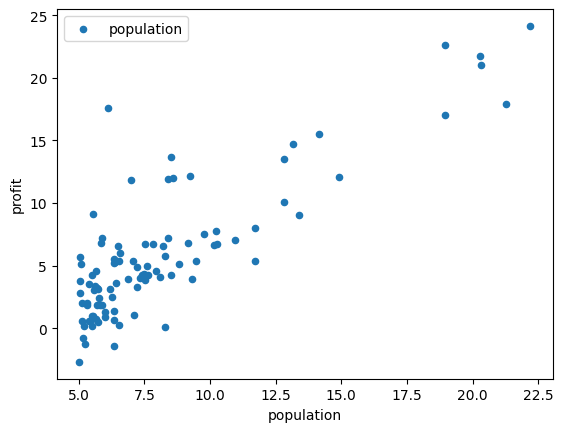

In [28]:
#数据可视化处理
data.plot.scatter(x='population', y='profit', label='population')
plt.show()

In [29]:
data.insert(0, 'ones', 1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [30]:
X = data.iloc[:, 0:-1]  #列数是ones和population
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [31]:
y = data.iloc[:, -1]
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [32]:
X = X.values  #转为数组

In [33]:
X.shape

(97, 2)

In [34]:
y = y.values  #标签值

In [35]:
y.shape

(97,)

In [36]:
y = y.reshape(97, 1)
y.shape

(97, 1)

In [37]:
#损失函数
def costFunction(X, y, theta):  #X:特征值，y:标签
    inner = np.power(X @ theta - y, 2)  #@: 矩阵乘法运算符，等同于 np.dot() 函数，用于计算两个数组的矩阵乘积。
    return np.sum(inner) / (2 * len(X))

In [38]:
theta = np.zeros((2, 1))  #因为要变为y（97*1）所以X（97*2）要乘（2*1）才行
theta.shape

(2, 1)

In [39]:
cost_init = costFunction(X, y, theta)
print(cost_init)

32.072733877455676


In [40]:
#梯度下降函数
# 梯度下降是一种优化算法，它通过迭代过程来更新参数θ，目的是最小化代价函数（cost function）
def gradientDescent(X, y, theta, alpha, iters):
    costs = []  #存储每一个时刻的损失函数的值
    for i in range(iters):
        theta = theta - (X.T @ (X @ theta - y)) * alpha / (len(X))  #更新theta
        cost = costFunction(X, y, theta)
        costs.append(cost)
        if i % 100 == 0:
            print(f"cost = {cost}")  #100整数倍打印
    return theta, costs


In [41]:
alpha = 0.01
iters = 1500
theta, costs = gradientDescent(X, y, theta, alpha, iters)
#由观察结果可得，损失函数的值不断下降

cost = 6.737190464870009
cost = 5.476362817272741
cost = 5.173634551165023
cost = 4.962606493117519
cost = 4.8155014941166865
cost = 4.712956453749759
cost = 4.6414735988143185
cost = 4.591643801766726
cost = 4.556908078409751
cost = 4.532694243543436
cost = 4.515815084502823
cost = 4.50404883551784
cost = 4.495846731678219
cost = 4.490129148489064
cost = 4.4861434933249615


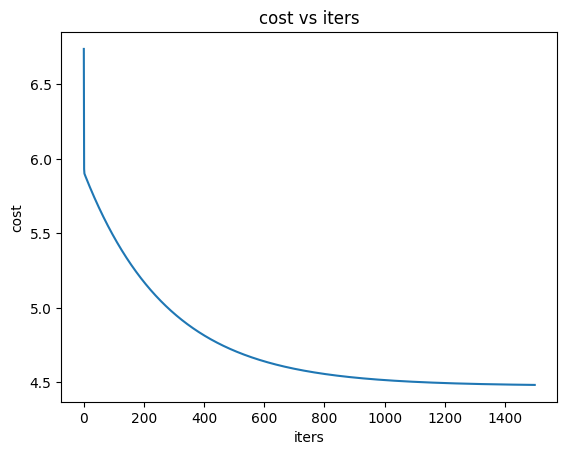

In [42]:
fig, ax = plt.subplots()  #fig就是绘图的图像#ax就是轴（绘图的实列）
ax.plot(np.arange(iters), costs)
ax.set(xlabel='iters', ylabel='cost', title='cost vs iters')
plt.show()

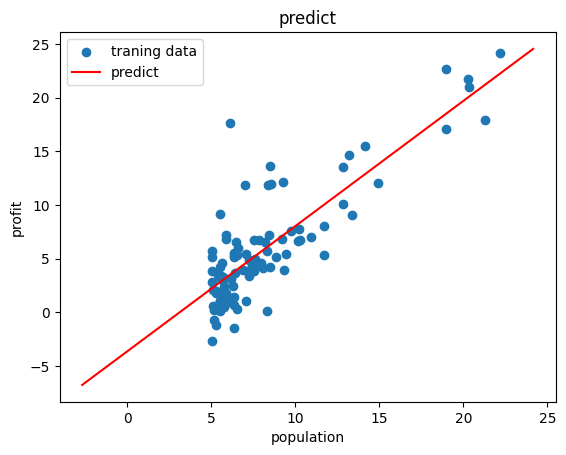

In [43]:
x = np.linspace(y.min(), y.max(), 100)
#这行代码创建了一个包含100个元素的数组 x，这些元素从 y 的最小值线性地增加到 y 的最大值。这个数组用于生成预测的 x 值。
y_ = theta[0, 0] + theta[1, 0] * x  #拟合的直线  
#这里，theta 是通过训练得到的线性回归模型参数，theta[0, 0] 是截距项，theta[1, 0] 是斜率。y_ 计算了给定 x 值的预测结果。这个预测结果是基于模型的线性假设，即 y = theta[0] + theta[1]*x。
fig, ax = plt.subplots()
ax.scatter(X[:, 1], y, label='traning data')  #散点图

ax.plot(x, y_, color='red', label='predict')
ax.legend()
ax.set(xlabel='population', ylabel='profit', title='predict')
plt.show()

In [44]:
theta

array([[-3.63029144],
       [ 1.16636235]])